<a href="https://colab.research.google.com/github/truffleToast/DeepLearning/blob/main/ex04_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small
# 데이터 경로 지정
train_dir = '/content/drive/MyDrive/Colab Notebooks/deepLearning/data/dogs_vs_cats_small/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/deepLearning/data/dogs_vs_cats_small/validation'

train_dir_dog = os.path.join(train_dir, "dogs")
train_dir_cat = os.path.join(train_dir, "cats")
valid_dir_dog = os.path.join(valid_dir, "dogs")
valid_dir_cat = os.path.join(valid_dir, "cats")

In [ ]:
import os

print(f"훈련데이터 개수 (개) : {len(os.listdir(train_dir_dog))}")
print(f"훈련데이터 개수 (고양이) : {len(os.listdir(train_dir_cat))}")
print(f"훈련데이터 개수 (개) : {len(os.listdir(valid_dir_dog))}")
print(f"훈련데이터 개수 (고양이) : {len(os.listdir(valid_dir_cat))}")

훈련데이터 개수 (개) : 1000
훈련데이터 개수 (고양이) : 1000
훈련데이터 개수 (개) : 500
훈련데이터 개수 (고양이) : 500


In [ ]:
# 하나의 변수에 이미지 파일 전부 다 합치기
# 픽셀값 변경 (0~255 정수) -> (0~1 실수)
## 1. 숫자의 크기 줄이기
## 2. 분산(값이 분표해있는 범위) 줄이기 -> 연산 상의 오류 줄어듦
# 이미지 크기 맞춰주기(150,150)
# 라벨링
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 픽셀값 변경하기
# 묵시적 형변환 하기
## 프로그래밍에서 연산상에서 타입이 변경되도록 하기
generator = ImageDataGenerator(rescale = 1./255) # 1. -> 1.0

In [ ]:
# 하나의 변수에 이미지 파일 전부 합치기
# 이미지 크기 동일하게 만들어주기
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.


In [ ]:
valid_generator = generator.flow_from_directory(
    directory = valid_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 1000 images belonging to 2 classes.


In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten

In [ ]:
# Dense만 사용 = MLP
# Conv, Pool 주로 사용 = CNN
# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     input_shape = (150,150,3), # 입력 데이터의 모양 (3 = RGB(Red, Green, Blue))  # 0 : 검은색, 255 : 흰색
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

####################### 특징 추출부 끝 #######################
model1.add(Flatten()) #  특징 추출부와 분류부를 이어주는 역할
####################### 분류 분석 시작 #######################
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']


)

In [ ]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 0.7356 - accuracy: 0.4910

KeyboardInterrupt: ignored

In [ ]:
import PIL.Image as pimg
import cv2
# 이미지 불러오기
pre_img = cv2.imread("/content/image_me.jpg",cv2.IMREAD_COLOR)
# 이미지 색상 변경하기
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경하기
pre_img = cv2.resize(pre_img,(150,150))
# 이미지 차원 변경하기
pre_img = pre_img.reshape((1,150,150,3))

error: ignored

In [ ]:
# 0 = cat
# 1 = dog
# 대다수의 사람이 개라는 결과를 얻음
# -> 모델이 학습이 덜 되어서 개의 규칙은 잘 찾았지만 고양이의 규칙은 잘 찾지 못했기 때문
model1.predict(pre_img)

ValueError: ignored

In [ ]:
# 부동 소수점 : 소수점의 위치가 변하지 않는
# 1.7243704e-35 = 1.7243704 * 10^(-35) <- 0이다!!!!!!!!!!

In [ ]:
# train accuracy : 0.98
# val accuracy : 0.7
# train은 학습이 잘 됐고, val은 학습이 안 됐다. -> 과대적합에 걸렸다
# 과대적합을 해소하는 방법
# 1. 데이터의 양을 늘린다(추가적으로 데이터를 수집) -> 많이 어려움
# 2. 모델을 더 깊게 구성한다. (층을 더 많이 쌓는다.)
# 3. 데이터를 확장한다.(가지고 있는 데이터를 다양하게 표현)

In [ ]:
# 데이터 확장을 하고 새롭게 학습한다
# 데이터를 확장하면 원본 데이터는 사라진다
# 모델 설계 -> 확장 안 된 이미지로 학습 -> 결과 확인 -> 만족스럽지 않다 -> 데이터 확장 후 학습

In [ ]:
# 기존 모델에 확장 데이터로 학습하기
aug_generator = ImageDataGenerator(
    rescale = 1./255, # 픽셀값 조정
    rotation_range = 20, # 회전 범위
    width_shift_range = 0.1, # 수평 이동
    height_shift_range = 0.1, # 수직 이동
    shear_range = 0.1, # 반시계 방향 회전
    zoom_range = 0.1, # 확대/축소 비율
    horizontal_flip = True, # 수평 뒤집기
    fill_mode = 'nearest' # 가까운 값으로 비어있는 곳을 채운다
)

In [ ]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

In [ ]:
model1.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = valid_generator
)

# 과대적합을 줄이는 방법들
- 증식
  - 장점 : 간단
  - 단점 : 가짜는 가짜다 (급격한 성능 향상은 없다)
  - epoch 수는 증가시켜주어야 한다.
- Dropout()
  - 층에 사용하는 퍼셉트론의 수를 설정한 비율만큼 사용하지 않는 방법
  - epoch마다 사용하지 않는 퍼셉트론은 랜덤
- BatchNormalization()
  - CNN층 = Conv(특성 추출) + Maxpooling(크기 축소)
  - Conv층의 파라미터를 정규화 (평균 0, 분산 1)         
    -> 음수가 발생                                     
    -> relu 를 적용하면                                           
    -> 음수가 사라지는 문제                              
    -> leaky relu
- GlobalAveragePooling2D()
  - CNN에서 가장 문제가 되는 층 : Maxpooling층         
    -> CNN 속도의 60% 이상을 차지
  - Maxpooling2D + Flatten()
  - Dense 층과 연결되는 층에 사용
  

- Data Generator : 학습을 시킬 때 한 번에 전체 데이터를 가져오는 것이 아니라 batch_size만큼씩만 가져와서 처리하도록 하는 것 (메모리 자원 부족을 해결)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255)

train_generator = generator.flow_from_directory(
    directory = train_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

valid_generator = generator.flow_from_directory(
    directory = valid_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# label(라벨)은 알파벳 순으로 0부터 부여
train_generator.class_indices, valid_generator.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

- 신경망 설계


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     input_shape = (150,150,3), # 입력 데이터의 모양 (3 = RGB(Red, Green, Blue))  # 0 : 검은색, 255 : 흰색
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

####################### 특징 추출부 끝 #######################
model1.add(Flatten())
####################### 분류 분석 시작 #######################
model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dropout (Dropout)           (None, 41472)            

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 12s 478ms/step - loss: 0.6958 - accuracy: 0.5250 - val_loss: 0.6816 - val_accuracy: 0.5200
Epoch 2/20
20/20 [==============================] - 11s 583ms/step - loss: 0.6601 - accuracy: 0.5765 - val_loss: 0.6499 - val_accuracy: 0.6030
Epoch 3/20
20/20 [==============================] - 9s 458ms/step - loss: 0.6300 - accuracy: 0.6440 - val_loss: 0.6259 - val_accuracy: 0.6390
Epoch 4/20
20/20 [==============================] - 9s 443ms/step - loss: 0.5546 - accuracy: 0.7275 - val_loss: 0.6686 - val_accuracy: 0.6240
Epoch 5/20
20/20 [==============================] - 9s 476ms/step - loss: 0.4724 - accuracy: 0.7745 - val_loss: 0.6377 - val_accuracy: 0.6930
Epoch 6/20
20/20 [==============================] - 9s 475ms/step - loss: 0.3921 - accuracy: 0.8235 - val_loss: 0.6238 - val_accuracy: 0.7110
Epoch 7/20
20/20 [==============================] - 9s 451ms/step - loss: 0.3103 - accuracy: 0.8730 - val_loss: 0.7128 - val_accuracy: 0.6880
Epoc

# GlobalAverage2D

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     input_shape = (150,150,3), # 입력 데이터의 모양 (3 = RGB(Red, Green, Blue))  # 0 : 검은색, 255 : 흰색
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     activation = 'relu'
))

# model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
#     pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
# ))

# ####################### 특징 추출부 끝 #######################
# model1.add(Flatten())
model1.add(GlobalAveragePooling2D())
####################### 분류 분석 시작 #######################
model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 global_average_pooling2d (  (None, 32)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 64)               

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 12s 473ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 9s 478ms/step - loss: 0.6934 - accuracy: 0.4915 - val_loss: 0.6925 - val_accuracy: 0.5130
Epoch 3/20
20/20 [==============================] - 9s 463ms/step - loss: 0.6925 - accuracy: 0.4955 - val_loss: 0.6912 - val_accuracy: 0.5350
Epoch 4/20
20/20 [==============================] - 9s 445ms/step - loss: 0.6914 - accuracy: 0.5105 - val_loss: 0.6886 - val_accuracy: 0.5900
Epoch 5/20
20/20 [==============================] - 9s 468ms/step - loss: 0.6859 - accuracy: 0.5230 - val_loss: 0.6817 - val_accuracy: 0.5150
Epoch 6/20
20/20 [==============================] - 9s 476ms/step - loss: 0.6898 - accuracy: 0.5255 - val_loss: 0.6824 - val_accuracy: 0.5670
Epoch 7/20
20/20 [==============================] - 11s 563ms/step - loss: 0.6778 - accuracy: 0.5600 - val_loss: 0.6701 - val_accuracy: 0.5810
Epoc

- BatchNormalization()
  - Conv2D()와 activation() 층 사이에 배치
  - Activaition()이 정규화 기능을 일부 수행 ->
Activaition() 다음에 배치하면 효과가 떨어짐
-> C+B+A+M => C+ A + B+ M

- 확실하게 성능이 향상됨
- 단점 :참 좋은데 설명할 길이 없네

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3)))
model1.add(BatchNormalization())
model1.add(Activation("leaky_relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
#model1.add(MaxPool2D( pool_size = (2,2)))

#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 72, 72, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 18s 587ms/step - loss: 0.6654 - accuracy: 0.5970 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 9s 467ms/step - loss: 0.6189 - accuracy: 0.6715 - val_loss: 0.7800 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 10s 500ms/step - loss: 0.5791 - accuracy: 0.7025 - val_loss: 1.0601 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 10s 491ms/step - loss: 0.5429 - accuracy: 0.7335 - val_loss: 1.1481 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 9s 469ms/step - loss: 0.5222 - accuracy: 0.7515 - val_loss: 1.2467 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 11s 563ms/step - loss: 0.4983 - accuracy: 0.7585 - val_loss: 1.2795 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 9s 455ms/step - loss: 0.4776 - accuracy: 0.7780 - val_loss: 1.4953 - val_accuracy: 0.5000
Ep

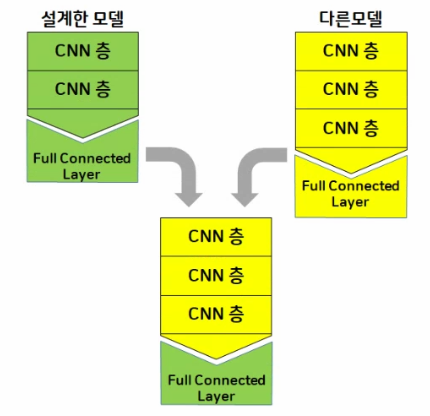

- 전이 학습을 하는 이유
  - 데이터가 부족
  - 설계한 신경망 그닥 좋지 못함
- 전이학습의 종류
  - CNN층을 그대로 사용하는 것(가중치)
  - 특성추출: CNN 층의 가중치를 그대로 사용
  - 미세조정: fine tuning : CNN층의 가중치를 일부 살짝 변경해서 사용